In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input , Dropout
import tensorflow as tf

2024-12-14 15:16:28.027255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734178588.094449   21523 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734178588.114684   21523 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 15:16:28.278258: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.random.set_seed(42)

In [3]:
# import sympy 
from sympy import sieve 

# Use sieve.primerange() method 
prime_gen = sieve.primerange(127, 255) 
prime_list = list(prime_gen) 
	
print("Prime numbers for the range of numbers [1, 255) : {}".format(prime_list)) 


Prime numbers for the range of numbers [1, 255) : [127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251]


# Convert the output to binary

In [4]:
binary_primes = [bin(prime)[2:] for prime in prime_list]
print(binary_primes)

['1111111', '10000011', '10001001', '10001011', '10010101', '10010111', '10011101', '10100011', '10100111', '10101101', '10110011', '10110101', '10111111', '11000001', '11000101', '11000111', '11010011', '11011111', '11100011', '11100101', '11101001', '11101111', '11110001', '11111011']


In [5]:
print(len(binary_primes))

24


# Binary multiplication method

In [6]:
def binary_multiply_integers(a: int, b: int) -> int:
    """
    Multiply two integers directly in their binary form using bitwise operations.

    Parameters:
    a (int): The first integer.
    b (int): The second integer.

    Returns:
    int: The product of the two integers.
    """
    product = 0
    while b > 0:
        # Check if the least significant bit of b is set
        if b & 1:
            product += a
        # Shift a to the left (equivalent to multiplying by 2)
        a <<= 1
        # Shift b to the right (equivalent to dividing by 2)
        b >>= 1
    return product


# Binary multiplication

It multiples every number with every element and displays first 10 results

In [7]:
# Convert binary strings to integers
int_primes = [int(binary, 2) for binary in binary_primes]

# Perform integer multiplication using binary_multiply_integers
results = []
for int1 in int_primes:
    for int2 in int_primes:
        product = binary_multiply_integers(int1, int2)
        results.append((int1, int2, product))

# Print sample results in binary format
print("Sample binary multiplications:")
for int1, int2, product in results[:10]:  # Display only the first 10 results
    print(f"{bin(int1)[2:]} * {bin(int2)[2:]} = {bin(product)[2:]}")


Sample binary multiplications:
1111111 * 1111111 = 11111100000001
1111111 * 10000011 = 100000011111101
1111111 * 10001001 = 100001111110111
1111111 * 10001011 = 100010011110101
1111111 * 10010101 = 100100111101011
1111111 * 10010111 = 100101011101001
1111111 * 10011101 = 100110111100011
1111111 * 10100011 = 101000011011101
1111111 * 10100111 = 101001011011001
1111111 * 10101101 = 101010111010011


Displaying last 10 results

In [8]:
# Print the last 10 results in binary format
print("Sample binary multiplications (last 10 results):")
for int1, int2, product in results[-10:]:  # Display only the last 10 results
    print(f"{bin(int1)[2:]} * {bin(int2)[2:]} = {bin(product)[2:]}")


Sample binary multiplications (last 10 results):
11111011 * 11000101 = 1100000100100111
11111011 * 11000111 = 1100001100011101
11111011 * 11010011 = 1100111011100001
11111011 * 11011111 = 1101101010100101
11111011 * 11100011 = 1101111010010001
11111011 * 11100101 = 1110000010000111
11111011 * 11101001 = 1110010001110011
11111011 * 11101111 = 1110101001010101
11111011 * 11110001 = 1110110001001011
11111011 * 11111011 = 1111011000011001


List structure

In [9]:
# Print the 10th result in binary format
binary1, binary2, product = results[9]
print(f"{bin(binary1)[2:]} * {bin(binary2)[2:]} = {bin(product)[2:]}")


1111111 * 10101101 = 101010111010011


# Find max length

In [10]:
# Calculate the maximum length of binary strings in the results
max_len = max(
    max(len(bin(x1)[2:]), len(bin(x2)[2:]), len(bin(product)[2:])) 
    for x1, x2, product in results
)


In [11]:
print(max_len)

16


In [29]:
def int_to_binary_array(n, length):
    """Convert an integer to a binary array with a specified length."""
    binary_str = bin(n)[2:].zfill(length)  # Convert to binary and pad with zeros
    return np.array([int(bit) for bit in binary_str])  # Convert to array of integers


# Reshaping it to fit the model

In [30]:
# Prepare the input data and target output
X = np.array([int_to_binary_array(product, max_len) for _, _, product in results])  # Input: product (binary)

# Concatenate binary arrays of multiplicand1 and multiplicand2
y = np.array([
    np.concatenate([int_to_binary_array(x1, max_len), int_to_binary_array(x2, max_len)])  # Concatenate multiplicand1 and multiplicand2
    for x1, x2, _ in results
])


In [31]:
print(X)

[[0 0 1 ... 0 0 1]
 [0 1 0 ... 1 0 1]
 [0 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 0 0 1]]


In [32]:
print(X.shape)
print(y.shape)

(576, 16)
(576, 32)


# Creating and training model

In [33]:
# Define the model
model = Sequential([
    Input(shape=(max_len,)),  # Input layer for the product (binary representation)
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(2*max_len, activation='sigmoid')  # Output layer (2 multiplicands concatenated)
])

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(X, y, epochs=100, batch_size=1024, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0243 - loss: 0.7084
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0608 - loss: 0.7011
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0660 - loss: 0.6955
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0903 - loss: 0.6897
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1250 - loss: 0.6847
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1927 - loss: 0.6799
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2257 - loss: 0.6754
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2587 - loss: 0.6704
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2535 - loss: 0.6652
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3160 - loss: 0.6589
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3837 - loss: 0.6530
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3889 - loss

# Example Prediction

In [36]:
# Example prediction
product_input = 0b100011000011011  # Example product in binary (converted to integer)
input_data = np.array([int_to_binary_array(product_input, max_len)])


In [37]:
# Get the prediction (two multiplicands)
prediction = model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


In [39]:
# Convert product_input to binary (without '0b' prefix)
product_input_binary = bin(product_input)[2:]

# Predict the binary output
predicted_binary = ''.join(str(int(round(bit))) for bit in prediction[0])

# Split the predicted binary into multiplicands
multiplicand1 = predicted_binary[:max_len]
multiplicand2 = predicted_binary[max_len:]

# Print the product in binary format
print(f"Predicted multiplicands for product {product_input_binary}: {multiplicand1} and {multiplicand2}")


Predicted multiplicands for product 100011000011011: 0000000010100111 and 0000000010100111


# Estimated probabilities of bits assuming the model considers 1

In [40]:
# Assuming 'prediction' is the output of your model, where each value is between 0 and 1

# Example prediction
predicted_probabilities = prediction[0]  # Get the predicted probabilities for the bits

# Inspect the predicted probabilities
print("Predicted probabilities for each bit:")
for i, prob in enumerate(predicted_probabilities):
    print(f"Bit {i}: {prob:.4f}")

# Convert the probabilities to binary values based on a threshold (e.g., 0.5)
predicted_binary = ''.join('1' if prob >= 0.5 else '0' for prob in predicted_probabilities)

print(f"Predicted binary string: {predicted_binary}")


Predicted probabilities for each bit:
Bit 0: 0.0158
Bit 1: 0.0242
Bit 2: 0.0127
Bit 3: 0.0208
Bit 4: 0.0172
Bit 5: 0.0260
Bit 6: 0.0096
Bit 7: 0.0404
Bit 8: 0.9298
Bit 9: 0.4634
Bit 10: 0.5362
Bit 11: 0.4623
Bit 12: 0.4463
Bit 13: 0.5041
Bit 14: 0.5794
Bit 15: 0.9875
Bit 16: 0.0203
Bit 17: 0.0302
Bit 18: 0.0103
Bit 19: 0.0173
Bit 20: 0.0238
Bit 21: 0.0148
Bit 22: 0.0090
Bit 23: 0.0196
Bit 24: 0.9311
Bit 25: 0.4827
Bit 26: 0.5239
Bit 27: 0.4749
Bit 28: 0.4446
Bit 29: 0.5332
Bit 30: 0.5843
Bit 31: 0.9634
Predicted binary string: 00000000101001110000000010100111


In [53]:
print(prediction[0])

[0.01575151 0.02417094 0.01267206 0.02075414 0.01716926 0.02600188
 0.00962903 0.04036744 0.9298185  0.46339372 0.53621334 0.4623057
 0.4463202  0.5040633  0.5794404  0.98750544 0.02027665 0.03024288
 0.01033894 0.01726052 0.02376834 0.01480933 0.00896852 0.01960656
 0.93109715 0.48273012 0.5238504  0.47489065 0.44460565 0.533195
 0.58432317 0.9634426 ]


# How many bits are predicted as 1 and 0 

This doesn't give us a true insight since we are padding numbers with 0

In [41]:
# Count how many bits are predicted to be 0 vs. 1
predicted_bits = [1 if prob >= 0.5 else 0 for prob in predicted_probabilities]
count_ones = sum(predicted_bits)
count_zeros = len(predicted_bits) - count_ones

print(f"Number of bits predicted as 1: {count_ones}")
print(f"Number of bits predicted as 0: {count_zeros}")


Number of bits predicted as 1: 10
Number of bits predicted as 0: 22


# Graph of predicted probabilities

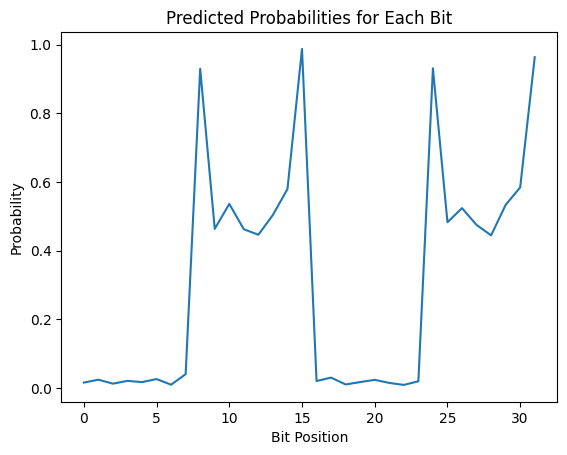

In [42]:
import matplotlib.pyplot as plt

# Plot the predicted probabilities for each bit
plt.plot(predicted_probabilities)
plt.title("Predicted Probabilities for Each Bit")
plt.xlabel("Bit Position")
plt.ylabel("Probability")
plt.show()
